Simon og Eirik

Ideer:
Utvide dataset:
- Bruke lat og lon til å si om en hviss housing ligger i et dyrt eller billig område
- Bruke lat og lon til å finne distanse til nærmeste metro eller "point of interest"
- 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Additional imports
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
df_listings = pd.read_csv("data/listings_CPH.csv")
df_listings.drop(columns=["name","host_id", "neighbourhood_group","license","host_name","last_review"], inplace=True, axis=1)
df_listings.fillna({'reviews_per_month':0}, inplace=True)
df_listings

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,6983,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,1.08,1,0,4
1,26057,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,0.55,1,303,8
2,26473,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2.06,3,56,7
3,29118,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,0.16,1,59,2
4,31094,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,0.13,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,sterbro,55.732840,12.572370,Entire home/apt,1250,14,0,0.00,1,0,0
13811,647809303952891559,Valby,55.667782,12.463285,Entire home/apt,450,3,3,1.01,1,0,3
13812,650819220455514228,Valby,55.659536,12.474726,Entire home/apt,400,1,3,1.27,1,0,3
13813,658612163688161695,Brnshj-Husum,55.730971,12.487993,Entire home/apt,850,1,0,0.00,1,0,0


In [4]:
df_stops = pd.read_csv("data/stops.txt")
# We are only interested in longitude and latitude of the stops
df_stops = df_stops.drop(columns=["stop_id","stop_code","stop_desc","zone_id","stop_url","location_type","parent_station","stop_timezone","level_id","wheelchair_boarding","platform_code"], axis=1)
# Remove all rows that does not have (Metro) in its name
df_stops = df_stops[df_stops['stop_name'].str.contains('\(Metro\)')].reset_index()
display(df_stops)

,index,stop_name,stop_lon,stop_lat
0,51,Vestamager St. (Metro),12.575297,55.619391
1,52,Ørestad St. (Metro),12.579389,55.629055
2,53,Sundby St. (Metro),12.585728,55.645199
3,54,Bella Center St. (Metro),12.582928,55.638051
4,55,Islands Brygge St. (Metro),12.585217,55.663422
...,...,...,...,...
73,61853,Marmorkirken St. (Metro),12.588632,55.685245
74,61854,Gammel Strand St. (Metro),12.579575,55.677749
75,61855,Rådhuspladsen St. (Metro),12.568803,55.676373
76,62103,Nordhavn St. (Metro),12.591834,55.707298


C:\Users\barla\AppData\Local\Temp/ipykernel_11948/3635372389.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_listings, x="longitude", y="latitude", palette="Set2")
C:\Users\barla\AppData\Local\Temp/ipykernel_11948/3635372389.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_stops, x="stop_lon", y="stop_lat", palette="Set2")


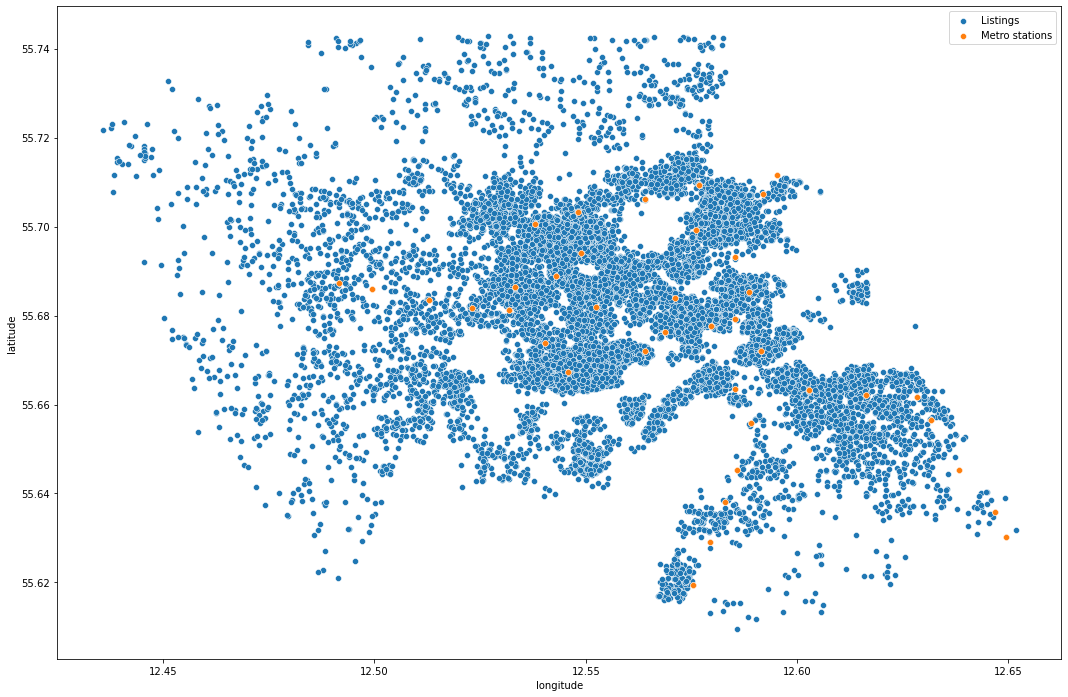

In [10]:
# Display all stations together with our listings
plt.figure(figsize=(18,12))
sns.scatterplot(data=df_listings, x="longitude", y="latitude", palette="Set2")
sns.scatterplot(data=df_stops, x="stop_lon", y="stop_lat", palette="Set2")
plt.legend(["Listings", "Metro stations"])
plt.show()

In [ ]:
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [53]:
api_token = "pk.eyJ1IjoiYmFybGF1ZyIsImEiOiJjbGE2czJqNGcwazJuM3dxenhucXAxb3E1In0.--v3HQgnOhI_fjUHxq0csg"

In [56]:
df = df_listings[["latitude", "longitude"]]
color1 = np.ones(len(df))
df_stops = df_stops.rename({"stop_lon": "longitude", "stop_lat": "latitude"}, axis=1)
color2 = np.zeros(len(df_stops))
df = df.append(df_stops)
color = np.concatenate((color1, color2))
df["color"] = np.concatenate((color1, color2))
display(df)

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", width=1100, height=800, color="color")
fig.update_layout(font_size=16,  title={'xanchor': 'center','yanchor': 'top', 'y':0.1, 'x':0.1,}, 
        title_font_size = 24, mapbox_accesstoken=api_token)#, mapbox_style = "mapbox://styles/strym/ckhd00st61aum19noz9h8y8kw")
fig.update_traces(marker=dict(size=6))            

,latitude,longitude,index,stop_name,color
0,55.686410,12.547410,NaN,NaN,1.0
1,55.693070,12.576490,NaN,NaN,1.0
2,55.676020,12.575400,NaN,NaN,1.0
3,55.670230,12.555040,NaN,NaN,1.0
4,55.666602,12.555283,NaN,NaN,1.0
...,...,...,...,...,...
73,55.685245,12.588632,61853.0,Marmorkirken St. (Metro),0.0
74,55.677749,12.579575,61854.0,Gammel Strand St. (Metro),0.0
75,55.676373,12.568803,61855.0,Rådhuspladsen St. (Metro),0.0
76,55.707298,12.591834,62103.0,Nordhavn St. (Metro),0.0
